# V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance and vs Temperature

This evaluation will use a PV module approximating a Rich Solar 200W 12V panel

In [44]:
# Setup
import pvlib
from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import richsolarpanels

In [45]:
rich_solar_12V_params = richsolarpanels.RICH_SOLAR_12V# Get Module Parameters

## V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance

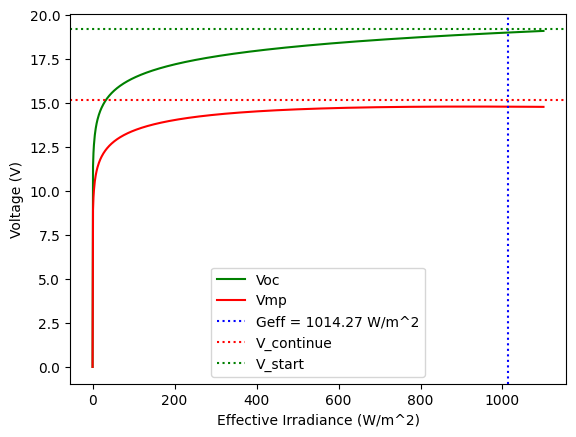

In [42]:
Temp = 68.78

Geff = np.linspace(0, 1100, 1000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Geff,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

#plot a vertical line at Geff = 1014.27 W/m^2
plt.axvline(x=1014.27, color='b', linestyle=':', label='Geff = 1014.27 W/m^2')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

## V<sub>oc</sub> and V<sub>mp</sub> vs Temperature

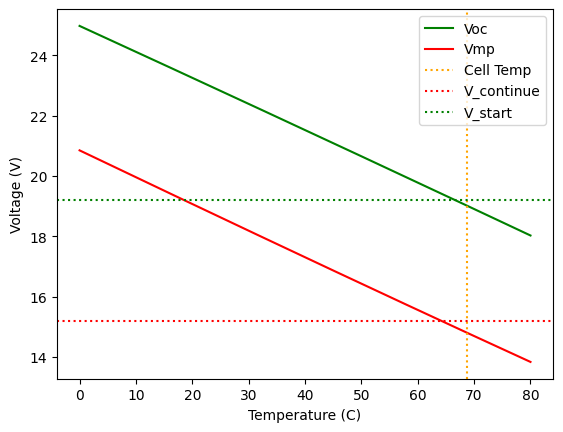

In [43]:
Temp = np.linspace(0, 80, 1000)

Geff = 1014.27

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s'],
    )

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Temp,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Temp,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (V)')
#plt.ylim(0, 25)

#plot a vertical line at 68.78C for T_continue
plt.axvline(x=68.78, color='orange', linestyle=':', label='Phoenix Max Cell Temp')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

TODO: Figure out why the voltage vs temperature performance here doesn't match the Phoenix data.

diode

photocurrent 11.898588406422846
saturation_current 3.68968675352568e-07
resistance_series 0.12270248066631148
resistance_shunt 194.4792269264424
nNsVth 1.1102641212801712
dc

i_sc 11.891084978201938
v_oc 19.18608360190865
i_mp 10.929954430794796
v_mp 14.968787599090424
p_mp 163.60816634230457
i_x 11.834078804806897
i_xx 7.679043506849262
cell temp
 66.78
Geff
 1014.27
panel

alpha_sc 0.006962
a_ref 0.973804158972974
I_L_ref 11.44031204496401
I_o_ref 7.608255760344541e-10
R_sh_ref 197.25444549468273
R_s 0.12270248066631148


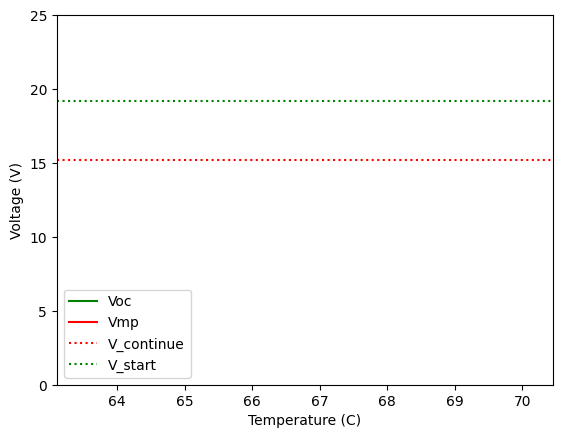

In [37]:
#run a particular case
#Temp = 25
Temp = 66.78

Geff = 1014.27

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s'],
    EgRef=EgRef,
    dEgdT=dEgdT
    )

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Temp,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Temp,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (V)')
plt.ylim(0, 25)

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

print('diode\n')
for key in SDE_params:
    print(key, SDE_params[key])

print('dc\n')
for key in curve_info:
    print(key, curve_info[key])

print('cell temp\n', Temp)
print('Geff\n', Geff)

print('panel\n')
print('alpha_sc', rich_solar_12V_params['alpha_sc'])
print('a_ref', rich_solar_12V_params['a_ref'])
print('I_L_ref', rich_solar_12V_params['I_L_ref'])
print('I_o_ref', rich_solar_12V_params['I_o_ref'])
print('R_sh_ref', rich_solar_12V_params['R_sh_ref'])
print('R_s', rich_solar_12V_params['R_s'])

